In [21]:
import sys
sys.executable

'/home/riamalhotra/WEEK_6/venv/bin/python'

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/final.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.277445,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994242,0
1,5575-GNVDE,Male,0,No,No,0.066327,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.173244,0
2,3668-QPYBK,Male,0,No,No,-1.236724,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.959674,1
3,7795-CFOCW,Male,0,No,No,0.514251,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.194766,0
4,9237-HQITU,Female,0,No,No,-1.236724,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.940470,1


In [ ]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000
mean,0.162147,-1.916841e-17,-6.204512e-17,-1.462852e-17,0.265370
std,0.368612,1.000071e+00,1.000071e+00,1.000071e+00,0.441561
min,0.000000,-1.318165e+00,-1.545860e+00,-9.991203e-01,0.000000
25%,0.000000,-9.516817e-01,-9.725399e-01,-8.298459e-01,0.000000
50%,0.000000,-1.372744e-01,1.857327e-01,-3.904632e-01,0.000000
75%,0.000000,9.214551e-01,8.338335e-01,6.642871e-01,1.000000
max,1.000000,1.613701e+00,1.794352e+00,2.826743e+00,1.000000


In [29]:
print("\nChurn Value Counts:")
print(df["Churn"].value_counts())


Churn Value Counts:
Churn
0    5174
1    1869
Name: count, dtype: int64


In [30]:
print("\nChurn Percentages:")
print(df['Churn'].value_counts(normalize=True)*100)


Churn Percentages:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [36]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

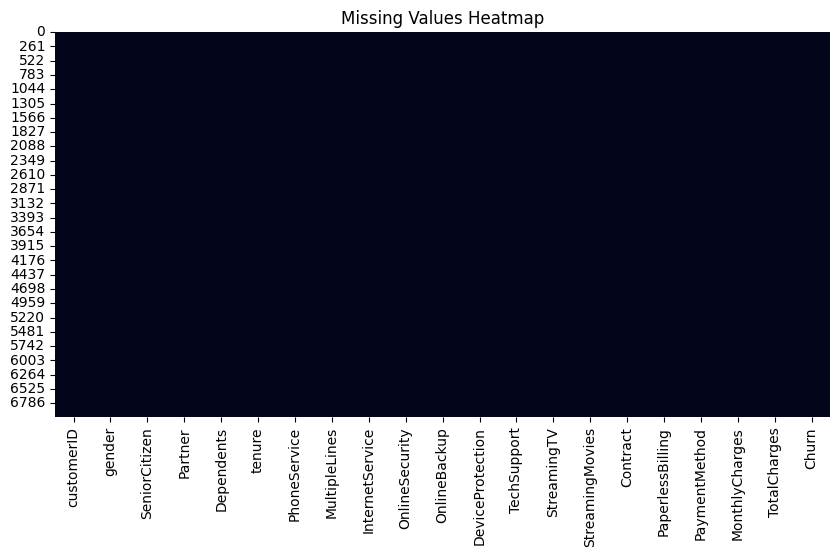

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


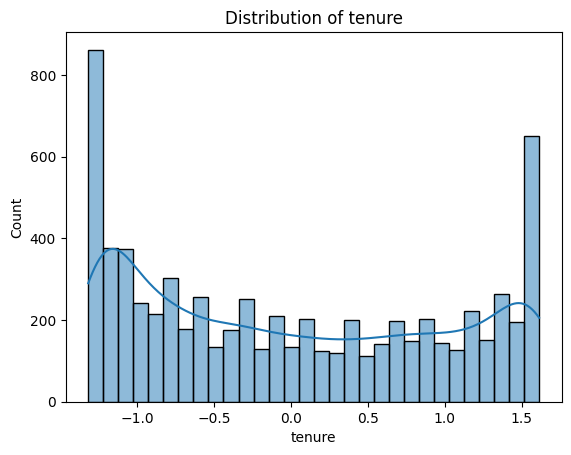

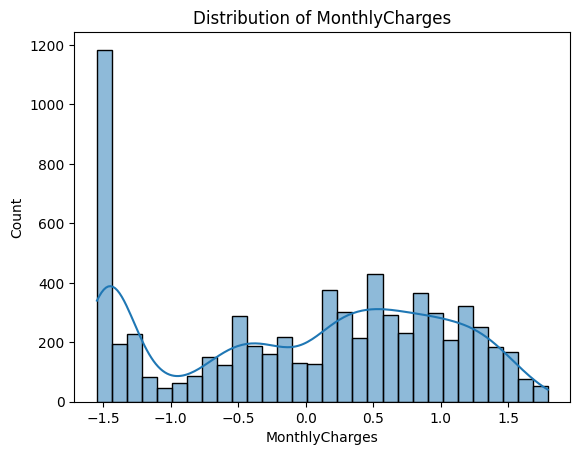

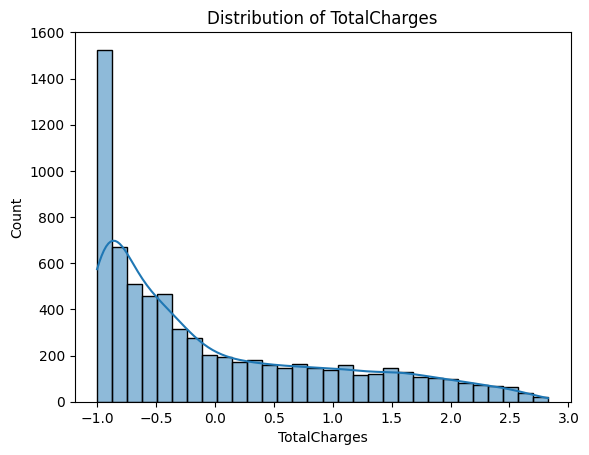

In [31]:
numeric_cols = ["tenure","MonthlyCharges","TotalCharges"]

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


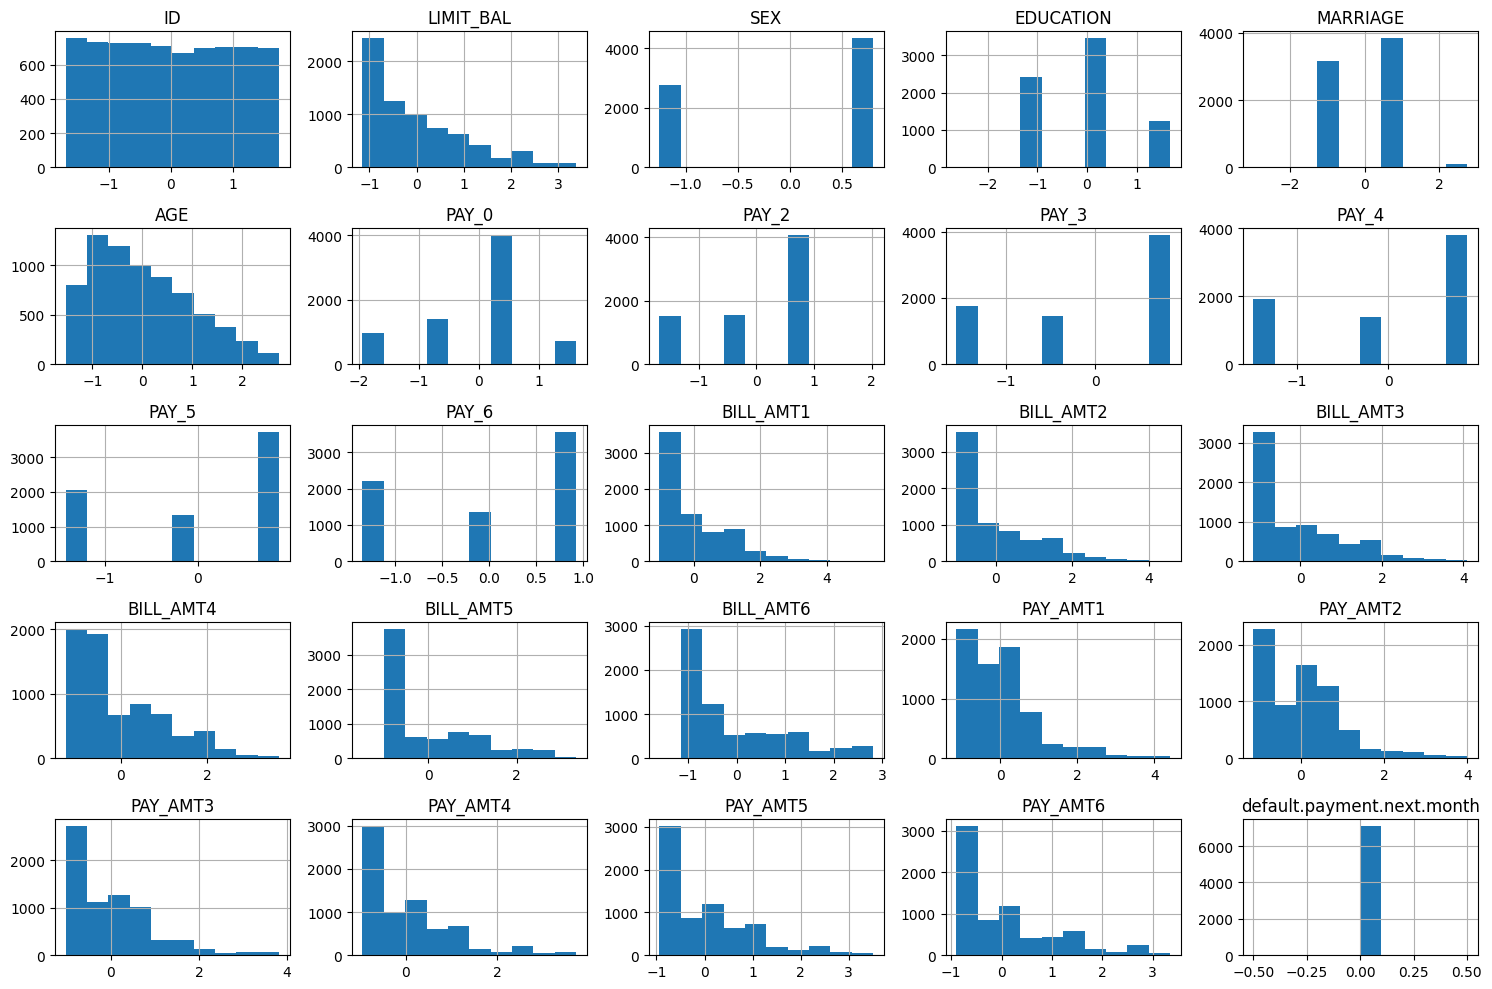

In [ ]:
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


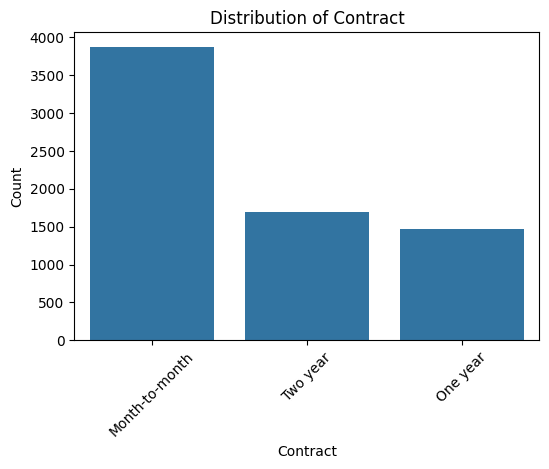

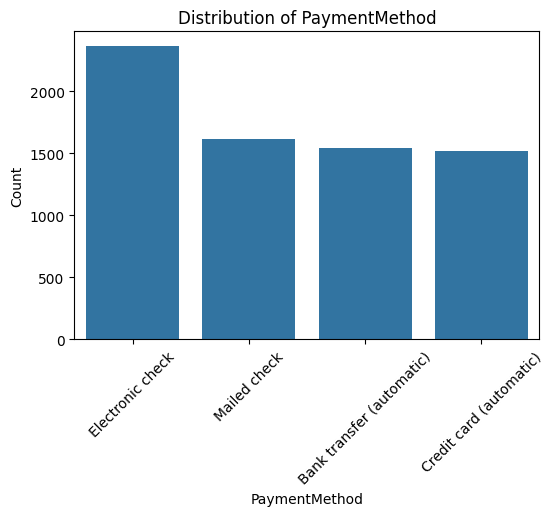

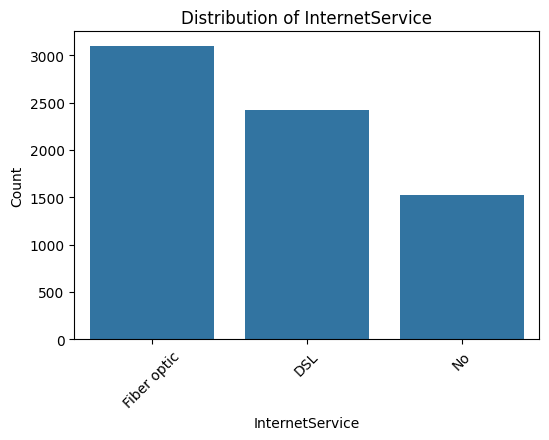

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns you want to visualize
categorical_cols = ["Contract", "PaymentMethod", "InternetService"]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    
    plt.show()


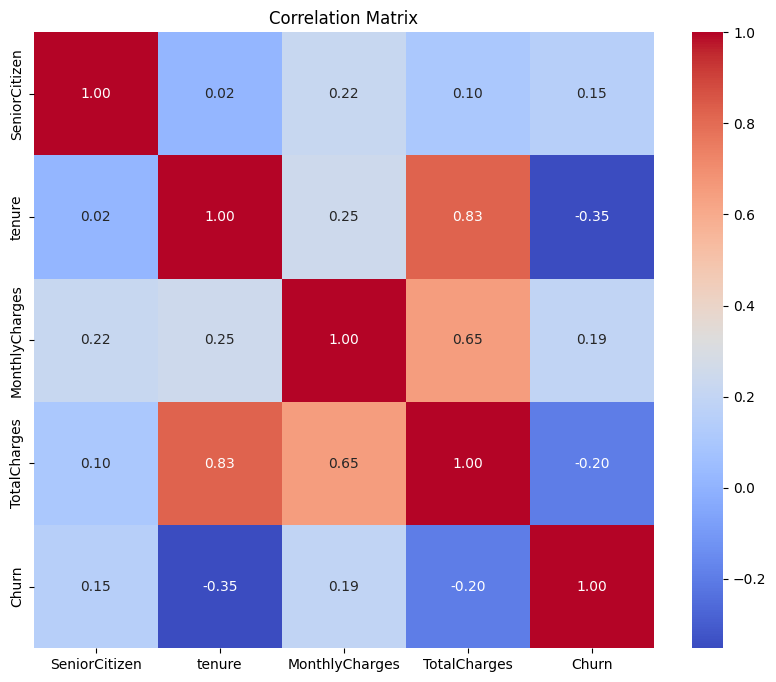

In [35]:
 # correlation Matrix (numeric only)
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()